# This notebook is to look at the data

## Imports

### Basic imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Getting White Wine Data

In [5]:
fl = "winequality-white.csv"
table = pd.read_csv(fl, delimiter = ";", header='infer')
table.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Print Histogram

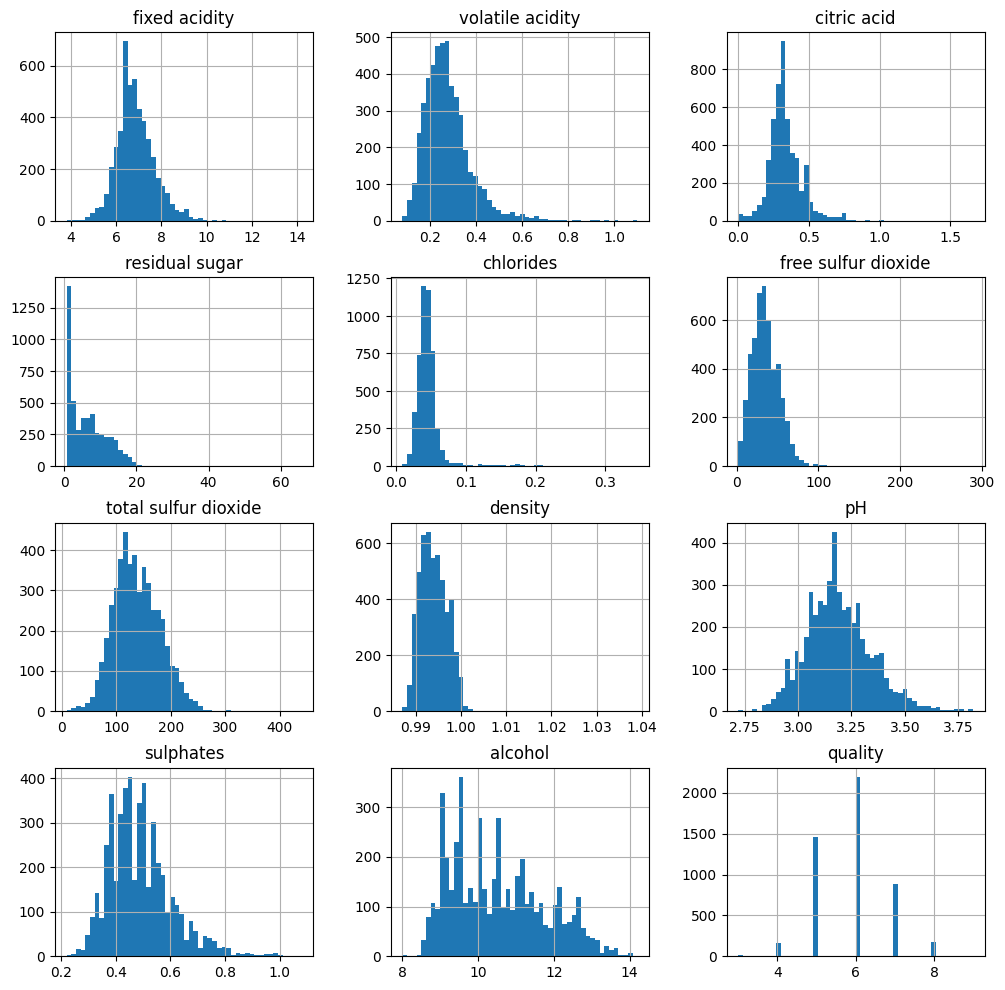

In [6]:
table.hist(figsize=(12,12),bins = 50)
plt.savefig("figures/historgram.png")

## Find nans

In [7]:
nans = table.loc[:, table.columns[table.isna().any()].tolist()]
nans.head()

""
0
1
2
3
4


There are no columns, so there is not any nan values in the data, correlating correctly with the dataset description

## Data preprocessing
In assignment 1, we tested for outliers and logarithmic data. Since we are using Autosklearn this time, we can have our data preprocessing done automatically by Autosklearn. As such, no manual data preprocessing is done

## Feature Selection

We look at the correlations with quality and choose the top 7, this will decrease chances of overfitting by having insignificant features.

In [9]:
table_corr = table.corr()
corr_quality = table_corr["quality"].apply(np.abs).sort_values(ascending=False)
print(corr_quality)

quality                 1.000000
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64
